In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import gensim
import os
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
from nltk.stem import WordNetLemmatizer 

%matplotlib inline
np.random.seed(400)

## Helper Functions 

In [2]:
nlp = spacy.load("en_core_web_sm")

# Lower Casing the Data
def convert_lower_case(data):
    return np.char.lower(data)

# Removing Stop Words
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

# Remove Punctuations
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

# Remove Apostrophe
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

def remove_words(data,filter_words):
    
    for i in range(len(filter_words)):
        data = np.char.replace(data,filter_words[i],"")
        
    return data
        
# Stemming
def stemming(data):
    stemmer= PorterStemmer()
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text


def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
        
    return new_text

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text


def spacy_preprocess(text):
    text = nlp(text)
    candidate_pos = ['NOUN', 'PROPN', 'VERB']
    jd = []
    for token in text:
        if token.pos_ in candidate_pos and token.is_stop is False:
            jd.append(str(token))

    return jd

def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist



def preprocess(data,filter_words):
    print("Lower Casing the Data..")
    data = convert_lower_case(data)
    print("Removing all punctuations...")
    data = remove_punctuation(data) #remove comma seperately
    print("Removing apostrophe...")
    data = remove_apostrophe(data)
    print("Removing Filter Words...")
    data = remove_words(data,filter_words)
    print("Removing Stop Words...")
    data = remove_stop_words(data)
    print("Converting Numerics to Words...")
    data = convert_numbers(data)
    print("Removing Punctuations Again...")
    data = remove_punctuation(data)
    print("Removing Stop Words Again...")
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    print("Lemmatization...")
    data = lemmatize(data)
    print("Stemming...")
    data = stemming(data)
    print("Preprocessing...\n\n")
    data = spacy_preprocess(data)
    return data


# Reading All the Terms and Condition Files

In [3]:
filter_words = ["facebook","whatsapp","instagram","terms","service","use"]
files = ['fb_terms.txt' ,'wa_terms.txt','insta_terms.txt']
docs = []
for file in files:
    with open(file,'rb') as terms:
        docs.append(terms.read().decode('utf-8'))

    

# Preprocessing Documents

### This Step Involves

- Preprocessing the Documents using various techniques like Stemming and Lemmatization
- Creating a Dictionary which is essentially a mapping of a word to it's integer ID

In [4]:
doc = docs
processed = [preprocess(docu,filter_words) for docu in doc]
dictionary = gensim.corpora.Dictionary(processed)

Lower Casing the Data..
Removing all punctuations...
Removing apostrophe...
Removing Filter Words...
Removing Stop Words...
Converting Numerics to Words...
Removing Punctuations Again...
Removing Stop Words Again...
Lemmatization...
Stemming...
Preprocessing...


Lower Casing the Data..
Removing all punctuations...
Removing apostrophe...
Removing Filter Words...
Removing Stop Words...
Converting Numerics to Words...
Removing Punctuations Again...
Removing Stop Words Again...
Lemmatization...
Stemming...
Preprocessing...


Lower Casing the Data..
Removing all punctuations...
Removing apostrophe...
Removing Filter Words...
Removing Stop Words...
Converting Numerics to Words...
Removing Punctuations Again...
Removing Stop Words Again...
Lemmatization...
Stemming...
Preprocessing...




# Creating the Bag of Words Corpus

### This step creates 
- A BOW Corpus which essentially maps the occurences of words in each document

In [5]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

# Example BOW for Document 0

In [6]:
document_num = 0
bow_doc_x = bow_corpus[document_num]
for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 0 ("abil") appears 3 time.
Word 1 ("abl") appears 2 time.
Word 2 ("abus") appears 1 time.
Word 3 ("access") appears 11 time.
Word 4 ("accord") appears 1 time.
Word 5 ("accordingli") appears 1 time.
Word 6 ("account") appears 20 time.
Word 7 ("accur") appears 2 time.
Word 8 ("acquisit") appears 1 time.
Word 9 ("action") appears 8 time.
Word 10 ("activ") appears 5 time.
Word 11 ("ad") appears 29 time.
Word 12 ("add") appears 1 time.
Word 13 ("address") appears 2 time.
Word 14 ("administ") appears 2 time.
Word 15 ("administr") appears 1 time.
Word 16 ("advanc") appears 6 time.
Word 17 ("advertis") appears 15 time.
Word 18 ("advis") appears 1 time.
Word 19 ("affili") appears 1 time.
Word 20 ("age") appears 3 time.
Word 21 ("agenc") appears 1 time.
Word 22 ("agre") appears 4 time.
Word 23 ("agreement") appears 4 time.
Word 24 ("allow") appears 2 time.
Word 25 ("alway") appears 2 time.
Word 26 ("amend") appears 1 time.
Word 27 ("analyz") appears 1 time.
Word 28 ("anoth") appears 1 time.

# We use Latent Dirichlet Allocation (LDA) as our preffered Topic Modelling Technique

In [7]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 2,
                                   workers = 2)

# Generating Topics using LDA

In [8]:
for idx, topic in lda_model.print_topics(-1):
    topic_words = topic.split('+')
    fin_words = []
    for i in range(len(topic_words)):
        fin_words.append(topic_words[i].strip().split('*')[1].replace("\"",""))

    print(fin_words)
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

['arbitr', 'disput', 'content', 'product', 'provid', 'inform', 'includ', 'law', 'state', 'account']
Topic: 0 
Words: 0.011*"arbitr" + 0.011*"disput" + 0.008*"content" + 0.008*"product" + 0.007*"provid" + 0.007*"inform" + 0.006*"includ" + 0.006*"law" + 0.006*"state" + 0.005*"account"


['product', 'content', 'provid', 'arbitr', 'disput', 'account', 'inform', 'includ', 'data', 'u']
Topic: 1 
Words: 0.011*"product" + 0.010*"content" + 0.008*"provid" + 0.007*"arbitr" + 0.007*"disput" + 0.007*"account" + 0.007*"inform" + 0.006*"includ" + 0.006*"data" + 0.006*"u"


['content', 'account', 'inform', 'provid', 'product', 'includ', 'share', 'ad', 'law', 'polici']
Topic: 2 
Words: 0.029*"content" + 0.021*"account" + 0.019*"inform" + 0.017*"provid" + 0.014*"product" + 0.014*"includ" + 0.014*"share" + 0.013*"ad" + 0.012*"law" + 0.012*"polici"


['inform', 'disput', 'product', 'includ', 'provid', 'content', 'arbitr', 'commun', 'account', 'u']
Topic: 3 
Words: 0.009*"inform" + 0.008*"disput" + 0.008*

# Visualization of the Topics Generated

Text(0.5, 1.0, 'Topic 1')

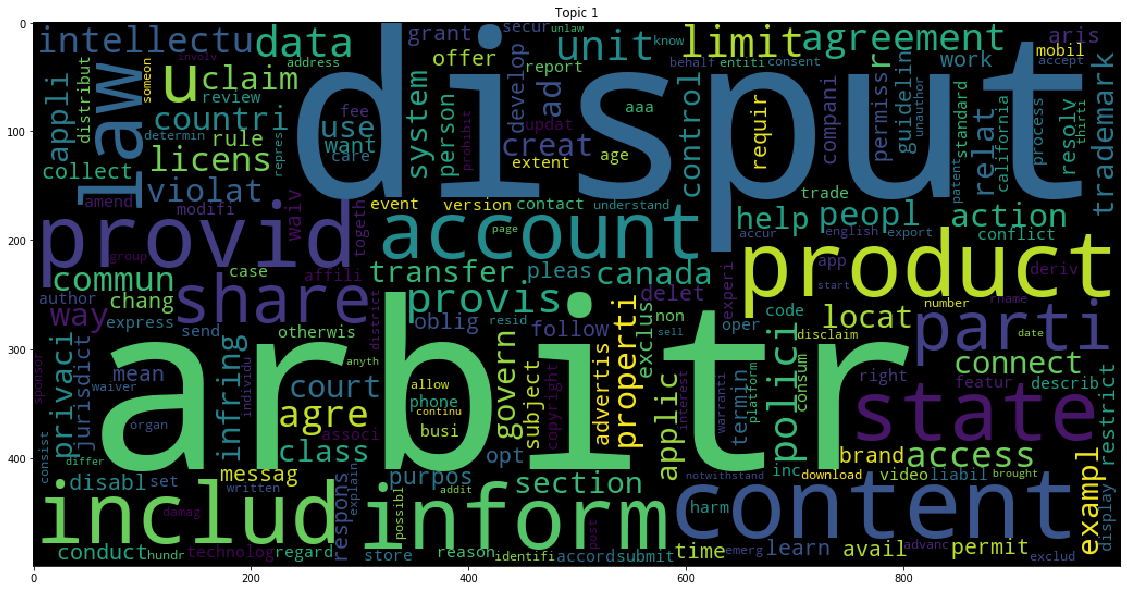

In [9]:
topic = lda_model.show_topic(0,200)
wctopic = {}
for i in range(len(topic)):
    wctopic[topic[i][0]] = topic[i][1]
    
    
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(width=1000, height=500).fit_words(wctopic))
plt.title("Topic 1")

Text(0.5, 1.0, 'Topic 2')

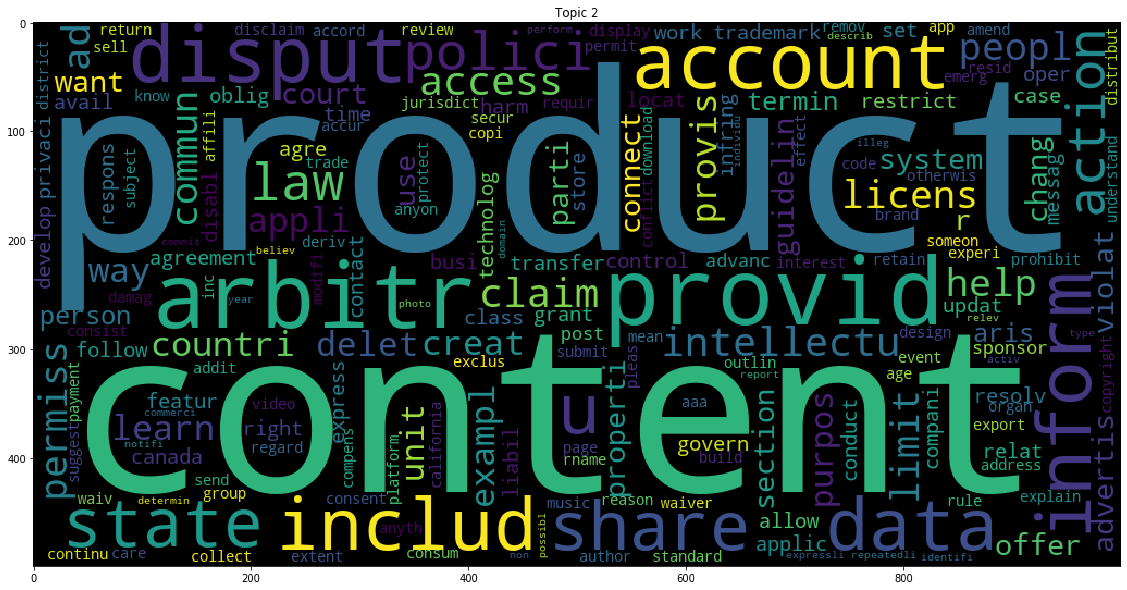

In [10]:
topic = lda_model.show_topic(1,200)
wctopic = {}
for i in range(len(topic)):
    wctopic[topic[i][0]] = topic[i][1]
    
    
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(width=1000, height=500).fit_words(wctopic))
plt.title("Topic 2")

Text(0.5, 1.0, 'Topic 3')

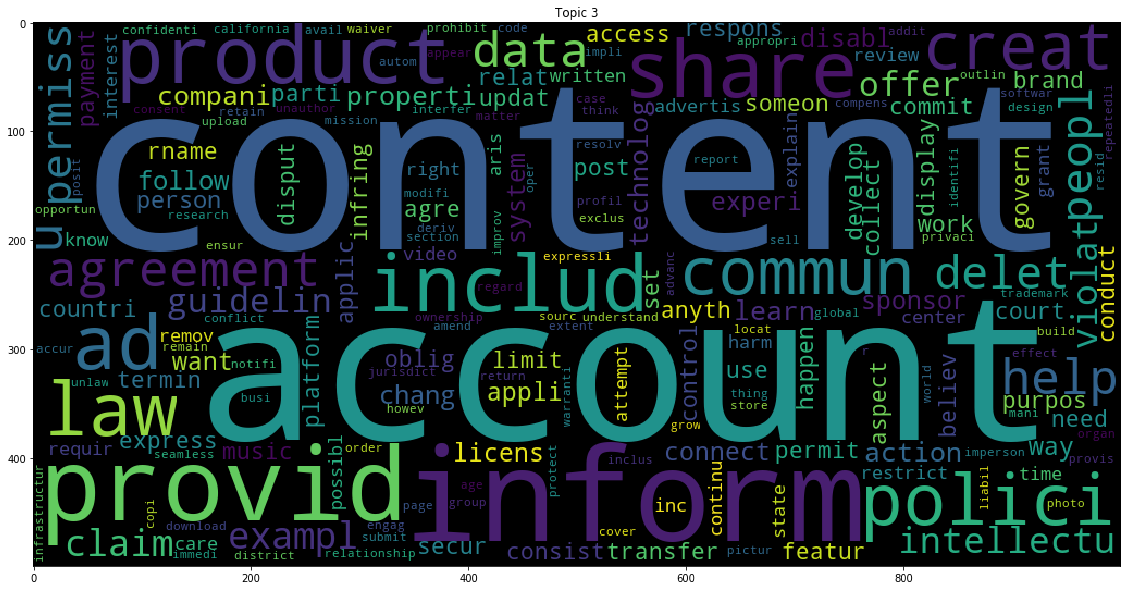

In [11]:
topic = lda_model.show_topic(2,200)
wctopic = {}
for i in range(len(topic)):
    wctopic[topic[i][0]] = topic[i][1]
    
    
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(width=1000, height=500).fit_words(wctopic))
plt.title("Topic 3")